## Run the code here and describe the procedure for yourself.

フーリエ級数展開
$$
f(t)=a_0+\sum_{n=1}^{\infty}{(a_n\cos (w_nt)+b_n\sin (w_nt))} \\
w_n=\frac{2\pi n}{T}\\
a_0=\int_0^T f(t)dt \\
a_n=\frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\cos (w_nt)dt \\
b_n=\frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\sin (w_nt)dt 
$$

矩形波
$$
s(t)=\text{sgn}(\sin \frac{t}{T})=\begin{cases} \begin{align}1\ \ &\text{if} \sin \frac{t}{T}>0\\
0\ \ &\text{if} \sin \frac{t}{T}=0\ \ \ (-\frac{T}{2} \leq t \leq \frac{T}{2})\\
-1\ \ &\text{if} \sin \frac{t}{T}<0\\
\end{align} \end{cases}
$$
をフーリエ級数展開すると、
$$
\begin{align}
a_0&=\int_{-\frac{T}{2}}^{\frac{T}{2}}s(t)dt \\
&=\int_{-\frac{T}{2}}^{0}-1dt+\int_{0}^{\frac{T}{2}}1 dt\\
&=-\frac{T}{2}+\frac{T}{2}=0\\
a_n&=\frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\cos (w_nt)dt \\
&=\frac{2}{T}\left(\int_{-\frac{T}{2}}^0 -1\cos (w_nt)dt+\int_0^{\frac{T}{2}}1\cos (w_nt)dt \right)\\
&=\frac{2}{T}\left(\left[-\frac{1}{w_n}\sin(w_nt)\right]_{-\frac{T}{2}}^0+\left[\frac{1}{w_n}\sin(w_nt)\right]_0^{\frac{T}{2}}\right)=0\\
b_n&=\frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\sin (w_nt)dt \\
&=\frac{2}{T}\left(\int_{-\frac{T}{2}}^0 -1\sin (w_nt)dt+\int_0^{\frac{T}{2}}1\sin (w_nt)dt \right)\\
&=\frac{2}{T}\left(\left[\frac{1}{w_n}\cos(w_nt)\right]_{-\frac{T}{2}}^0+\left[-\frac{1}{w_n}\cos(w_nt)\right]_0^{\frac{T}{2}}\right)\\
&=\frac{2}{w_nT}((1-\cos(\pi n))-(\cos(\pi n)-1))\\
&=\frac{4}{w_nT}(1-\cos(\pi n))\\
&=\begin{cases}\frac{4}{\pi n}\ \ \text{if}\ n=2m-1\\ 0\ \ \text{if}\ n=2m \end{cases}
\end{align}
$$
なので、
$$
s(t)=\sum_{i=2m-1,\ m \in \mathbb{N}}^{\infty} b_n(\sin(w_n t))
$$
と書くことができる。

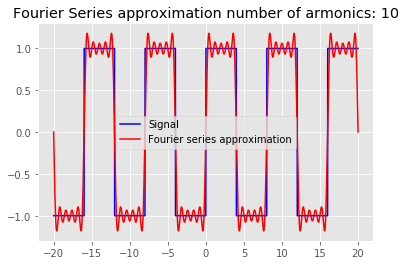

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Setup
x_ = np.linspace(-20,20,10000)

T = 8 # 周期を8とする
armonics = 10 # cos/sinの項の数

def squareWave(x):
    global T # グローバル変数を読み込む 初期値=8
    # 周期Tの矩形波を定義する
    # -T/2<=x<=0のときs(x)=-1、0<=x<=T/2のときs(x)=1とする
    lowerBoundLeft = (-T/2) 
    lowerBoundRight = 0 
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    one = 1
    negativeOne = -1

    while True: # 入力xに対してループ処理を行う
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return one
        # xが-T/2<=x=<T/2の範囲にない場合は、s(x)=1,-1の範囲をT/2だけそれぞれ正・負の方向へずらし、1の符号を逆転させる
        # つまり、-T<=x<=-T/2のときs(x)=1、T/2<=x<=Tのときs(x)=-1となるように更新する
        # これをすべての入力:xについて処理する
        else:
            lowerBoundLeft -= T/2
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if one == 1:
                one = -1
                negativeOne = 1
            else:
                one = 1
                negativeOne = -1

# Bn coefficients
# 上式より、nが奇数のときb_n=4/pi*n
def bn(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0

# Wn
def wn(n):
    global T
    wn = (2*np.pi*n)/T
    return wn

# Fourier Series function
def fourierSeries(n_max,x):
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
        try:
            partialSums = partialSums + bn(n)*np.sin(wn(n)*x)
        except:
            print("pass")
            pass
    return partialSums


y = []
f = []
for i in x_:
    y.append(squareWave(i))
    f.append(fourierSeries(armonics,i))


plt.plot(x_,y,color="blue",label="Signal")
plt.plot(x_,f,color="red",label="Fourier series approximation")
plt.title("Fourier Series approximation number of armonics: "+str(armonics))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


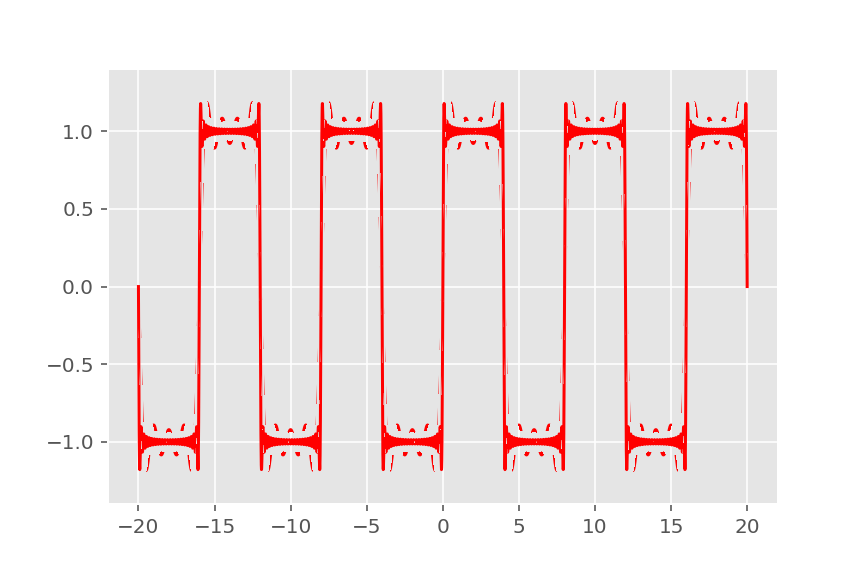

In [21]:
%matplotlib notebook
# harmonicsを変えていく(1~50)
import matplotlib.animation as animation

fig = plt.figure()

ims = []
y = []

for k in x_:
    y.append(squareWave(k))

for i in range(2,51):
    f = []
    for j in x_:
        f.append(fourierSeries(i,j))
    im = plt.plot(x_,f,color="red")
    ims.append(im)
                 
ani = animation.ArtistAnimation(fig,ims)
plt.show()